<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/DataAbstractionWordCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Abstraction Specialist

### The *Position Overview* mentions abstracting data from medical examiner's reports and building databases from it.  Below is a demo using some Python code to locate each instance of the  text as well as the sentence it was found in.

In [13]:
import re

In [ ]:
import nltk
nltk.download('all')

this project was done using Google's colab

We have converted a Medical Examiner'r report as text file.

In [32]:
#read in txt file
with open("/content/Autopsy_report.txt", "r") as f:
  text = f.read()
  print(text)

﻿AUTOPSY REPORT
Autopsy: BPD110094-67F DECEDENT: John Anderson
Autopsy Authorized by: Dr. Smith for City of Indianapolis. Identified by: fingerprints and dental comparison.
Rigor: absent
Livor: purple Distribution: posterior Age: 34
Race: White
Sex: Male
Length: 72 inches Weight: 185 pounds Eyes: Hazel
Hair: Brown Circumcised: Yes
Body Heat: Refrigerated
CLOTHING:
1. Blue dress shirt, blood-stained and scorched. Multiple tears of different sizes on the front. Both lower arms are shredded.
2. White T-shirt, blood-stained and scorched with multiple tears of different sizes on the front matching the tears on the blue dress shirt.
3. Red tie shredded, scorched and blood-stained.
4. Brown pants, blood-stained with irregular tears, scorching, and soot
deposition, primarily on the left upper leg and crotch.
5. Brown belt.
6. White underwear briefs, torn on left side with searing, soot deposition and blood stains.
7. Brown socks.
8. Black shoes.
EXTERNAL EXAMINATION:
Well developed, well nouri

In [33]:
def tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ^0-9]', '', str(text))
    return text.split()

In [ ]:
text

## Word Count

In [22]:
tokens = tokenize(text)
tokens[:10]

['autopsy',
 'reportautopsy',
 'bpd11009467f',
 'decedent',
 'john',
 'andersonautopsy',
 'authorized',
 'by',
 'dr',
 'smith']

In [20]:
from collections import Counter

In [23]:
def word_counter(tokens):
    word_counts = Counter()
    word_counts.update(tokens)
    return word_counts
word_count = word_counter(tokens)
word_count.most_common(5)

[('and', 73), ('of', 58), ('the', 35), ('multiple', 24), ('left', 23)]

This space inserted to help it print "pretty", i.e., the graph panded just on the fold, so we inserted this blank space to push it down.

.

.

.

.

Visualize Word count

In [24]:
import matplotlib.pyplot as plt

In [ ]:
x = list(word_count.keys())[:10]
y = list(word_count.values())[:10]
plt.bar(x, y)
plt.show();

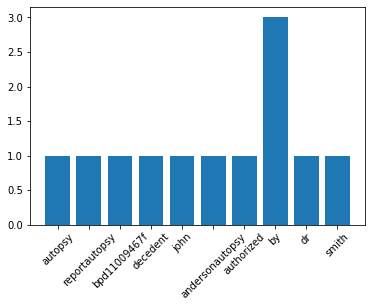

In [29]:
x = list(word_count.keys())[:10]
y = list(word_count.values())[:10]
plt.bar(x, y)
degrees = 45
plt.xticks(rotation=degrees)
plt.show();

 So that we can build a database of our results let us covert this a pandas dataframe and then export the results as csv file.

In [30]:
import pandas as pd

In [35]:
def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # Word and count columns
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # Rank column
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # Percent Total column
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # Cumulative percent total column
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    # Appears in column
    t2 = list(zip(appears_in.keys(), appears_in.values()))
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    # Appears in percent column
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    
    return wc.sort_values(by='rank')
  
wc = count([tokens])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
369,and,1,73,1.0,0.078158,0.078158,1.0
158,of,1,58,2.0,0.062099,0.140257,1.0
276,the,1,35,3.0,0.037473,0.177730,1.0
38,multiple,1,24,4.0,0.025696,0.203426,1.0
258,left,1,23,5.0,0.024625,0.228051,1.0


In [36]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
369,and,1,73,1.0,0.078158,0.078158,1.0
158,of,1,58,2.0,0.062099,0.140257,1.0
276,the,1,35,3.0,0.037473,0.177730,1.0
38,multiple,1,24,4.0,0.025696,0.203426,1.0
258,left,1,23,5.0,0.024625,0.228051,1.0
...,...,...,...,...,...,...,...
0,homecause,1,1,394.0,0.001071,0.995717,1.0
131,injuriesmanner,1,1,395.0,0.001071,0.996788,1.0
181,deathhomicidefragmentation,1,1,396.0,0.001071,0.997859,1.0
191,hemorrhagelacerations,1,1,397.0,0.001071,0.998929,1.0


Download a csv.


In [39]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [43]:
wc.to_csv('MedExamWordCount.csv')
!cp data.csv "drive/My Drive/"